In [1]:
import pickle
import numpy as np
import pandas as pd
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt

from function.utilities import get_subset

# Param

In [23]:
#####CHANGE HERE#####
algorithm = "VL3-BA" #VLXT, VSL2, VL3-BA
#####CHANGE HERE#####

In [24]:
plot_subset = ['>=30','>=40','>=50'] #'>=20', '>=30', '>=40', '>=50', '>=60' 
table_s1_path = Path('./output/table_s1')

# Load data

In [25]:
pondr_disorder_ident_path = Path("./output/pondr_disorder_ident")

od_human_df = pd.read_pickle(pondr_disorder_ident_path / "{}_od_human_df.pkl".format(algorithm))
# od_rbp_df = get_subset(od_human_df, "rbp")
# od_mrbp_df = get_subset(od_human_df, "mrbp")

In [26]:
od_human_df

,uniprot_id,order_sequence,disorder_sequence,od_ident
0,A0A024RBG1,****************FKKRAACLCFRSEQE***************...,MMKFKPNQTRTYDREG***************DEVLLVSSSRYPDQW...,1111111111111111000000000000000111111111111111...
1,A0A075B6H7,MEAPAQLLFLLLLWLPDTTREIVMTQ********************...,**************************SPPTLSLSPGERVTLSCRAS...,0000000000000000000000000011111111111111111111...
2,A0A075B6H8,MDMRVPAQLLGLLLLWLPGVRFDIQMTQSPSFLSASVGDRVSIICW...,**********************************************...,0000000000000000000000000000000000000000000000...
3,A0A075B6H9,MAWTPLLFLTLLLHCTGSLSQLVLTQSPS***********TCTLSS...,*****************************ASASLGASVKL******...,0000000000000000000000000000011111111111000000...
4,A0A075B6I0,MSVPTMAWMMLLLGLLAYGSGVDSQTVVTQE***************...,*******************************PSFSVSPGGTVTLTC...,0000000000000000000000000000000111111111111111...
...,...,...,...,...
20320,Q9YNA8,**********KYASYLSFIKILLKRGGVKVSTKNLIKLFQIIEQFC...,MGQTKSKIKS************************************...,1111111111000000000000000000000000000000000000...
20321,U3KPV4,MALKEGLRAWKRIFWRQILLTLGLLGLFLYGLPKFRHLEALIPMGV...,**********************************************...,0000000000000000000000000000000000000000000000...
20322,W5XKT8,MALLALASAVPSALLALAVFRVPAWACLLCFTTYSERLRICQMFVG...,**********************************************...,0000000000000000000000000000000000000000000000...
20323,W6CW81,***********TSLDNITDEELDRFKCFLPDEFNIATGKLHTLNST...,MESKYKEILLL***********************************...,1111111111100000000000000000000000000000000000...


## Different list of rbp
numbers of rbps(1533) is a bit less than "Gerstberger, et al."(1542), mainly cause by duplicate records


|no.|  gene name form  <br>Gerstberger, et al  | reason  |
|----|  :----  | :----  |
|1| PABPC1L2B | duplicate with **PABPC1L2A** |
|2| AARSD1    | duplicate with **PTGES3L-AARSD1** |
|3| FRG1B     | does not have uniprot_id |
|4| SMN2      | duplicate with **SMN1** |
|5| RPS17L    | duplicate with **RPS17**|
|6| RBMY1F    | duplicate with **RBMY1J**|
|7| RPL41     | sequence is too short |
|8| hCG_2045905| unreviewed from uniprot |
|9| VARS2| unreviewed from uniprot |

# Consecutive disordered stat

In [27]:
def length_filter(disorder_length, od_ident):
    """
    filter disorder length longer than disorder_length
    
    disorder_length: int, 
    od_ident: str, order/disorder indication seq, 1 is disorder, 0 is order
    """
    count = 0
    for i in od_ident:
        if i == "1":
            count = count + 1
            if count >= disorder_length:
                return 1
        else:
            count = 0
    return 0

def make_consecutive_disorder_stat(df):
    
    #count sequences which disorder length are longer than condition
    df[">=20"] = df["od_ident"].apply(lambda x: length_filter(20, x))
    df[">=30"] = df["od_ident"].apply(lambda x: length_filter(30, x))
    df[">=40"] = df["od_ident"].apply(lambda x: length_filter(40, x))
    df[">=50"] = df["od_ident"].apply(lambda x: length_filter(50, x))
    df[">=60"] = df["od_ident"].apply(lambda x: length_filter(60, x))

    b20 = df[">=20"].value_counts()[1] / len(df)
    b30 = df[">=30"].value_counts()[1] / len(df)
    b40 = df[">=40"].value_counts()[1] / len(df)
    b50 = df[">=50"].value_counts()[1] / len(df)
    b60 = df[">=60"].value_counts()[1] / len(df)

    b20 = round(b20 * 100, 1)
    b30 = round(b30 * 100, 1)
    b40 = round(b40 * 100, 1)
    b50 = round(b50 * 100, 1)
    b60 = round(b60 * 100, 1)

    return {">=20": b20,
            ">=30": b30, 
            ">=40": b40, 
            ">=50": b50,
            ">=60": b60,}

In [28]:
# mrbp = make_consecutive_disorder_stat(od_mrbp_df)
# rbp = make_consecutive_disorder_stat(od_rbp_df)
# human = make_consecutive_disorder_stat(od_human_df)
# output = {"algorithm": algorithm, "human": human, "rbp": rbp, "mrbp": mrbp}
# output

# Many

In [29]:
expset = ["human", "rbp", "mrbp", "trbp", "snrbp", "snorbp", "ncrbp", "rrbp", "irrbp"]
path = Path("/home/wenlin/tmp")

In [30]:
output = {}
for i in expset:
    od_subset_df = get_subset(od_human_df, i)
    od_stat = make_consecutive_disorder_stat(od_subset_df)
    
    output['algorithm'] = algorithm
    output[i] = {"subset":i,
                 "nums": len(od_subset_df),
                 "stat":od_stat}

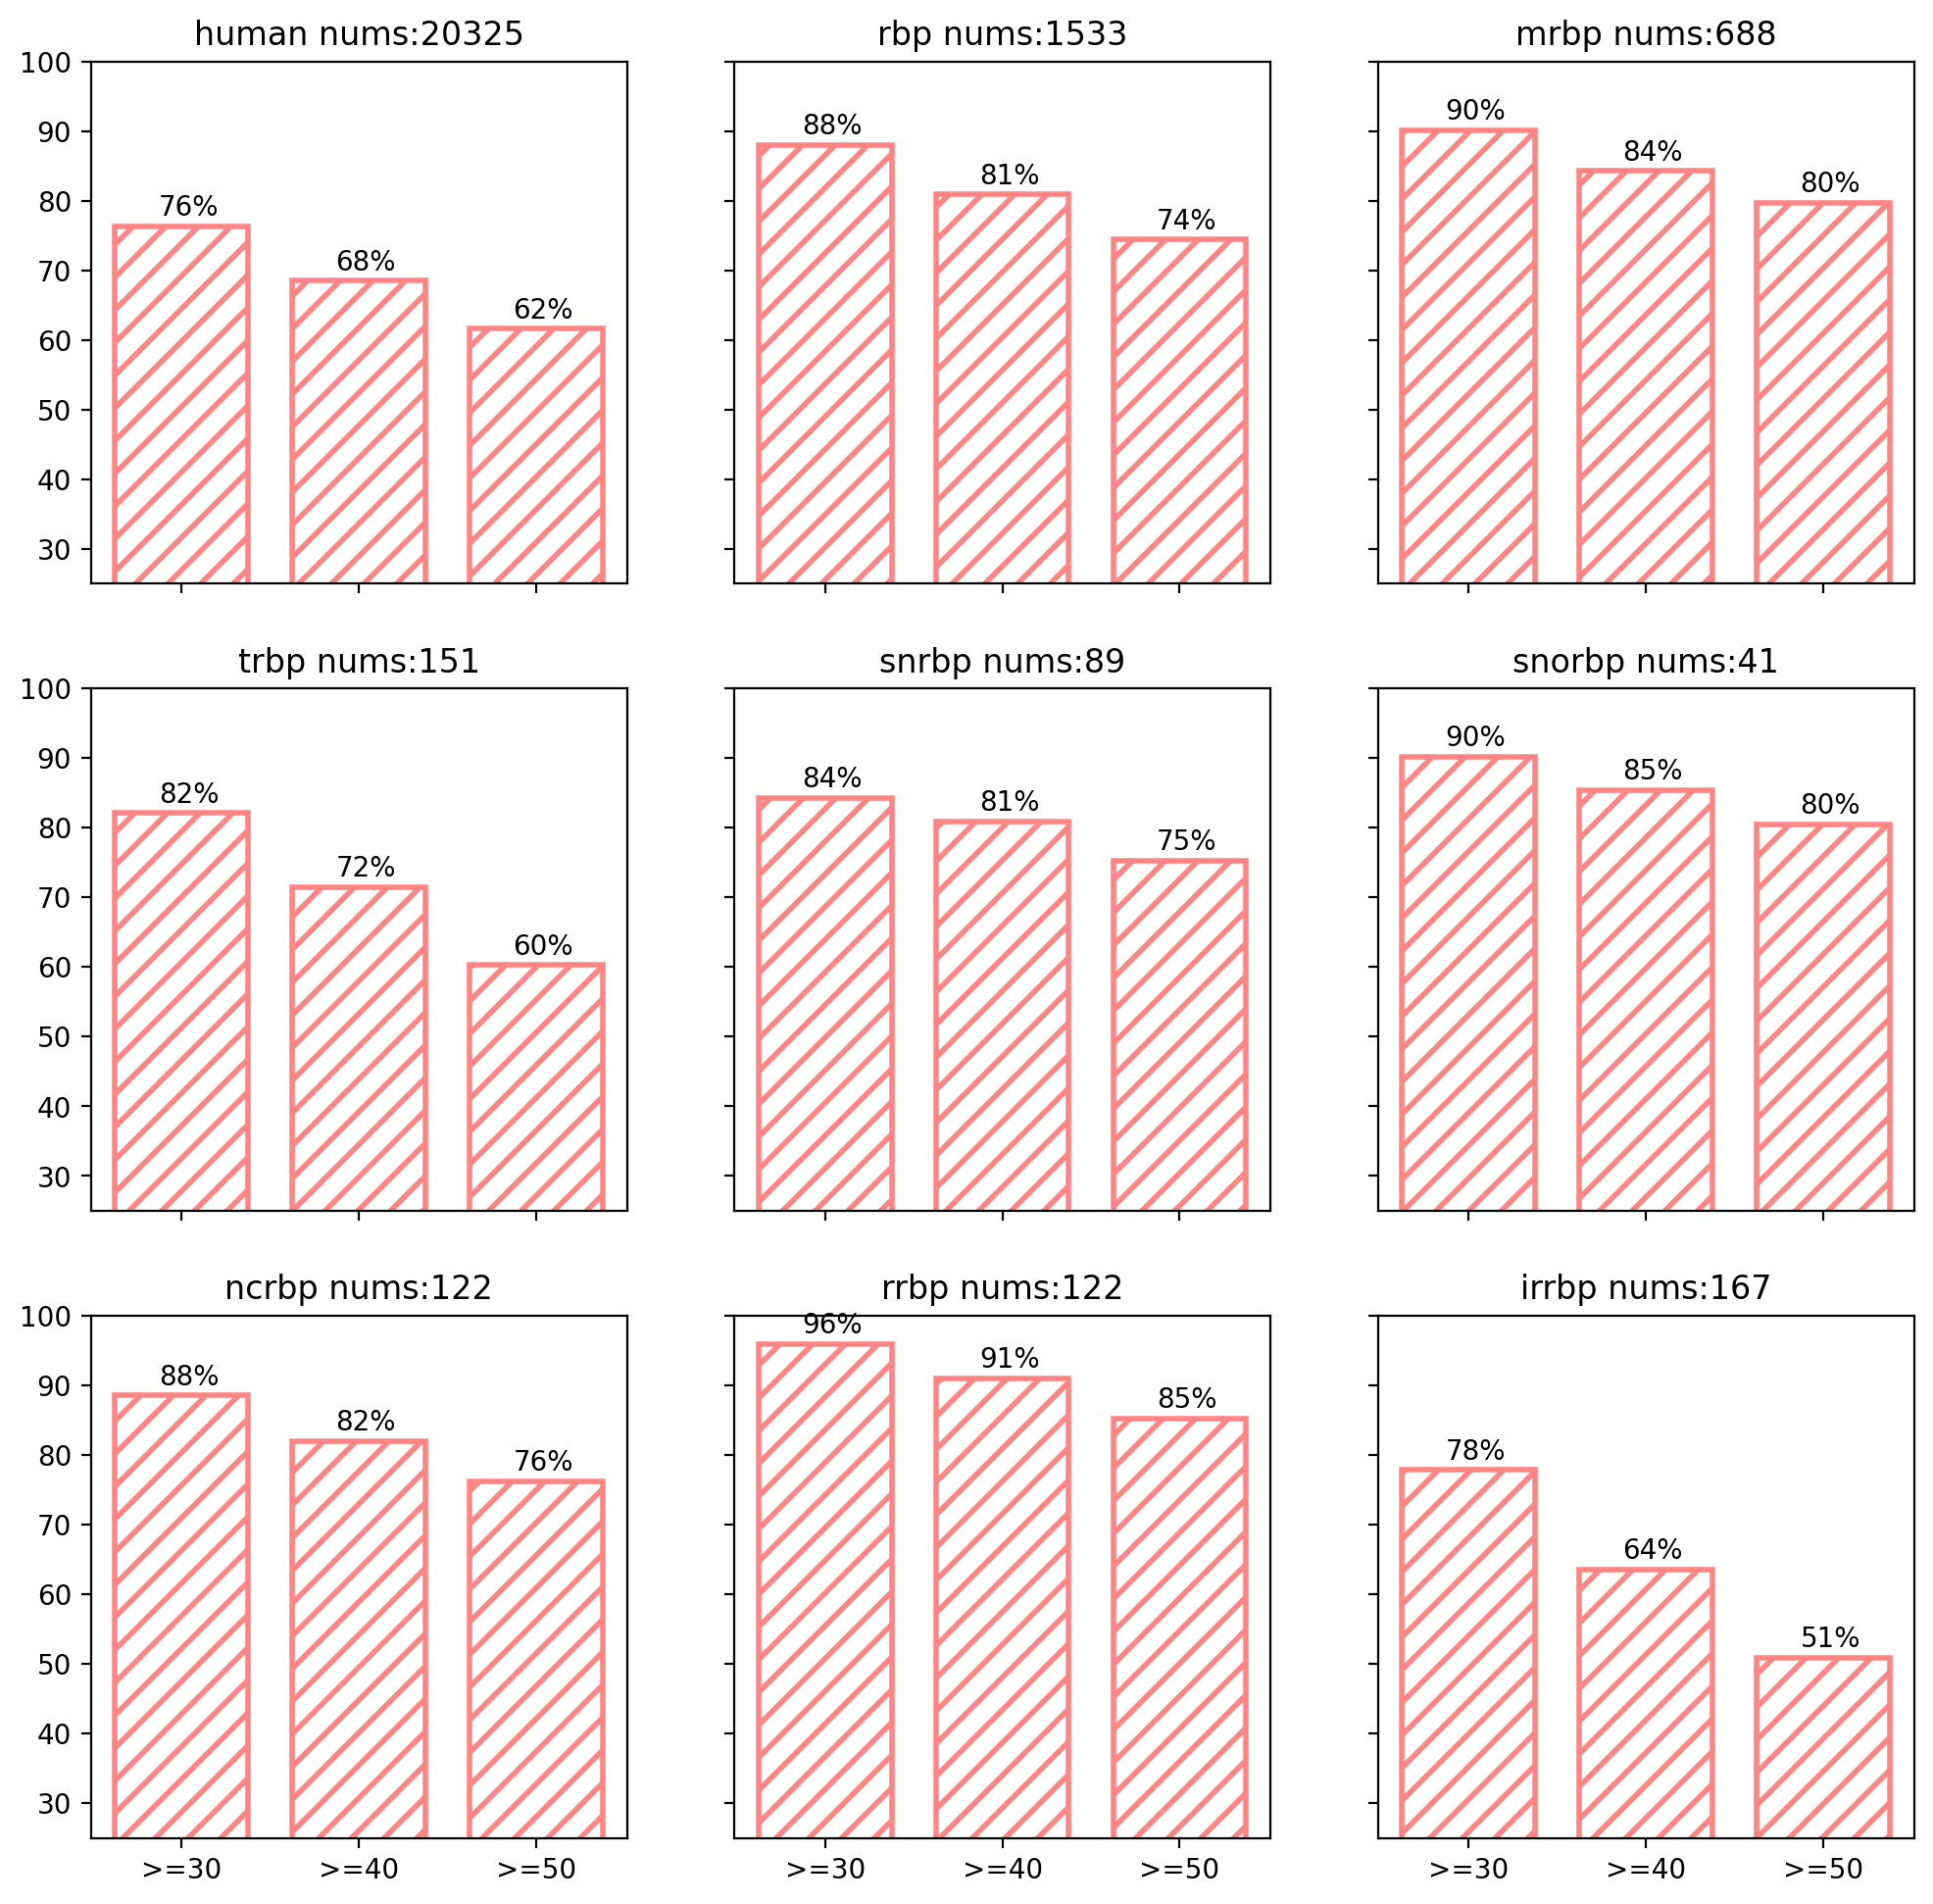

In [31]:
#PLOT BATCH
def plot(subset, subplot):
    
    plot_data = [output[subset]['stat'][x] for x in plot_subset]
    
    
    subplot.bar(X, plot_data, width=0.75, tick_label=plot_subset, color="white", hatch="//", linewidth=2, edgecolor="#ff8484")
    for x, y in zip(X,plot_data):
        subplot.text(x-0.13, y+1.5, "{}%".format(str(round(y))),fontsize=10)
    subplot.set_title("{} nums:{}".format(output[subset]['subset'], output[subset]['nums']))
    subplot.set_ylim(25,100)

    
    
mpl.rcParams["hatch.linewidth"] = 2
f, ((a0, a1, a2), (a3, a4, a5), (a6, a7, a8)) = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(12, 12), dpi=200)

X = np.arange(0, len(plot_subset))

plot("human", a0)
plot("rbp", a1)
plot("mrbp", a2)
plot("trbp", a3)
plot("snrbp", a4)
plot("snorbp", a5)
plot("ncrbp", a6)
plot("rrbp", a7)
plot("irrbp", a8)


output_path = path / "{}.jpg".format(algorithm)
f.savefig(output_path)

In [32]:
df = pd.DataFrame()
for i in expset:
    df['length_longer_than'] = output[i]['stat'].keys()
    df[i] = output[i]['stat'].values()

output_path = path / "{}.csv".format(algorithm)
df.to_csv(output_path, index=False, sep=' ')

In [22]:
####

# Plot

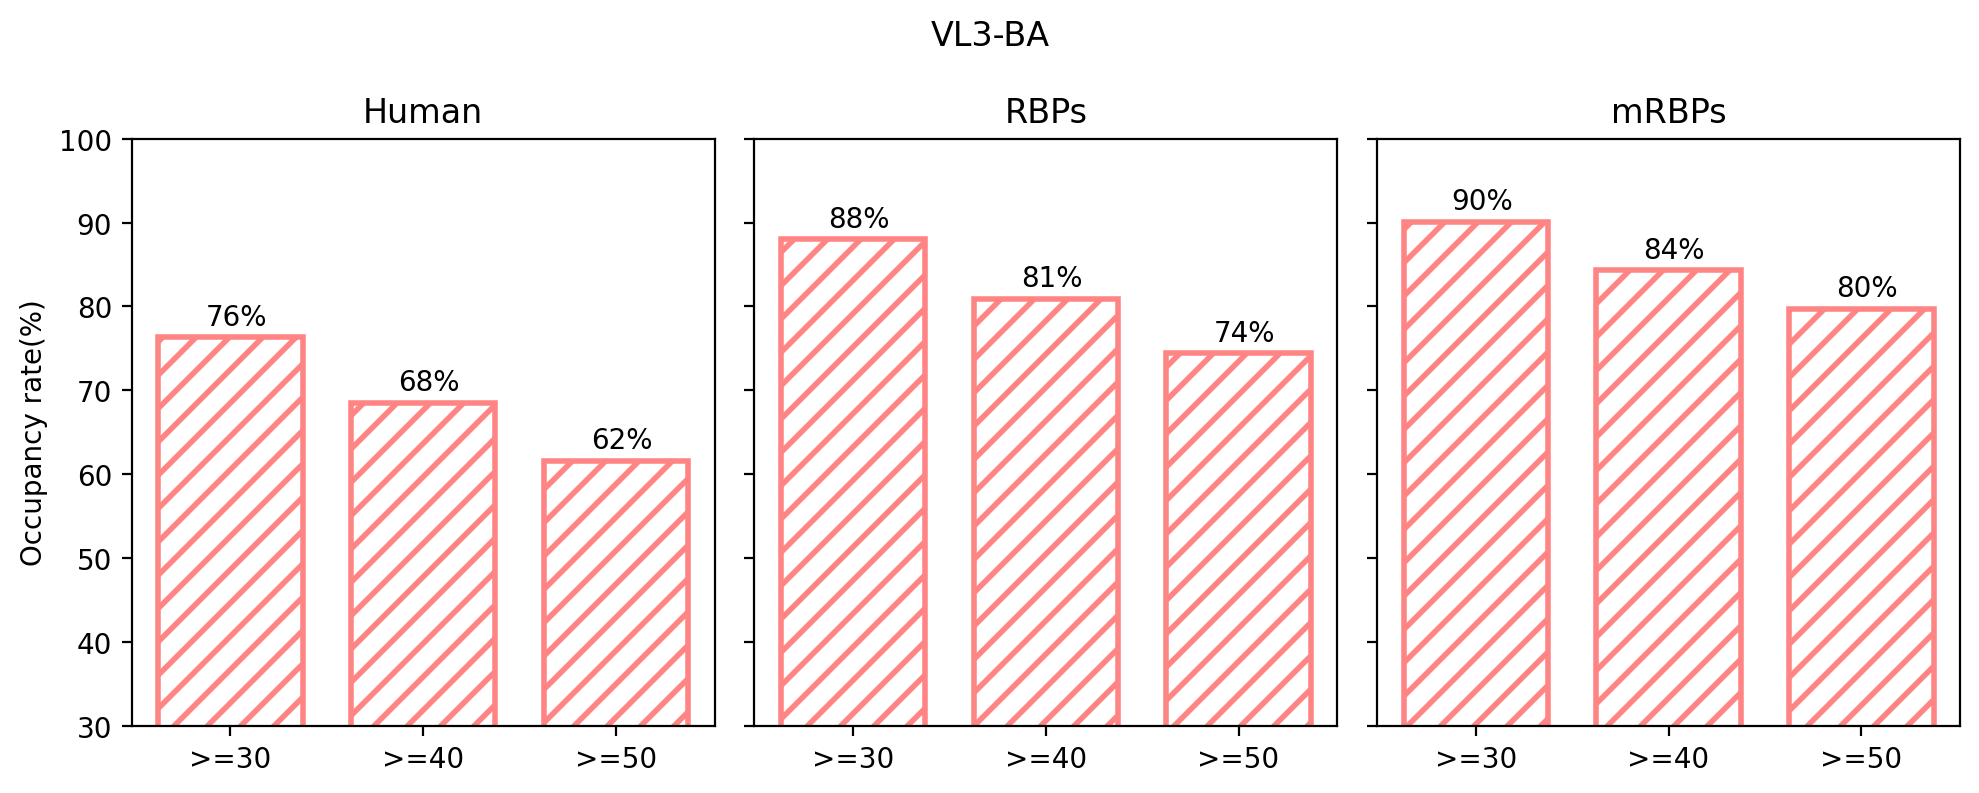

In [21]:
mpl.rcParams["hatch.linewidth"] = 2
f, (a0, a1, a2) = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10, 4), dpi=200)

X = np.arange(0, len(plot_subset))
human_plot_subset = [output["human"][x] for x in plot_subset]
rbp_plot_subset = [output["rbp"][x] for x in plot_subset]
mrbp_plot_subset = [output["mrbp"][x] for x in plot_subset]

a0.bar(X, human_plot_subset, width=0.75, tick_label=plot_subset, color="white", hatch="//", linewidth=2, edgecolor="#ff8484")
for x, y in zip(X,human_plot_subset):
    a0.text(x-0.13, y+1.5, "{}%".format(str(round(y))),fontsize=10)
a0.set_title("Human")
a0.set_ylabel("Occupancy rate(%)")
a0.set_ylim(30, 100)

a1.bar(X, rbp_plot_subset, width=0.75, tick_label=plot_subset, color="white", hatch="//", linewidth=2, edgecolor="#ff8484")
for x, y in zip(X,rbp_plot_subset):
    a1.text(x-0.13, y+1.5, "{}%".format(str(round(y))),fontsize=10)
a1.set_title("RBPs")

a2.bar(X, mrbp_plot_subset, width=0.75, tick_label=plot_subset, color="white", hatch="//", linewidth=2, edgecolor="#ff8484")
for x, y in zip(X,mrbp_plot_subset):
    a2.text(x-0.13, y+1.5, "{}%".format(str(round(y))),fontsize=10)
a2.set_title("mRBPs")


f.suptitle(algorithm)
f.tight_layout()

# table s1 output

In [22]:
df = pd.DataFrame()

df["Length longer than"] = output["human"].keys()
df["Human proteins (%)"] = output["human"].values()
df["RNA binding proteins (%)"] = output["rbp"].values()
df["(RBP Human) (%)"] = df["RNA binding proteins (%)"] - df['Human proteins (%)']
df["mRNA binding proteins (%)"] = output["mrbp"].values()
df["(mRBP Human) (%)"] = df["mRNA binding proteins (%)"] - df["Human proteins (%)"]

df.to_excel(table_s1_path/"{}.xlsx".format(algorithm))
df

,Length longer than,Human proteins (%),RNA binding proteins (%),(RBP Human) (%),mRNA binding proteins (%),(mRBP Human) (%)
0,>=20,83.3,93.3,10.0,93.9,10.6
1,>=30,76.3,88.0,11.7,90.1,13.8
2,>=40,68.5,80.9,12.4,84.3,15.8
3,>=50,61.6,74.4,12.8,79.7,18.1
4,>=60,55.7,66.6,10.9,74.1,18.4
